In [139]:
import logging, sys
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Load data from Database

In [141]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    tweets = pd.read_sql_query(f"SELECT * FROM tweets", connection)
    songs = pd.read_sql_query(f"SELECT * FROM songs", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

Data Analysis

In [152]:
songs.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


<Axes: xlabel='target', ylabel='count'>

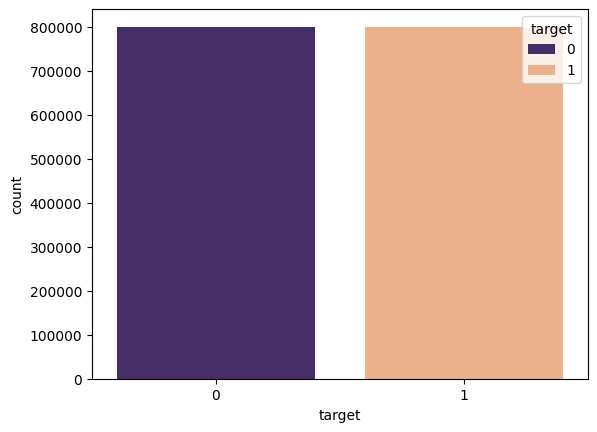

In [142]:
sns.countplot(x="target", palette=['#432371',"#FAAE7B"], hue="target", data=tweets)

In [127]:
positive_tweet = tweets[tweets.target == 1]["processed_text"]
negative_tweet = tweets[tweets.target == 0]["processed_text"]
tweets[tweets.target == 0]["text"].iloc[2]

'my whole body feels itchy and like its on fire '

(-0.5, 399.5, 199.5, -0.5)

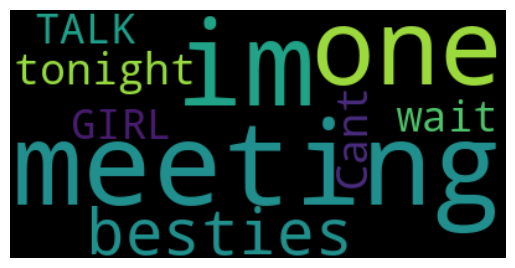

In [121]:
wordcloud = WordCloud().generate(positive_tweet.iloc[1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Data Preprocessing

In [99]:
tweets.iloc[0]["processed_text"]

'upset update facebook texting might cry result school today also blah'

In [100]:
X = tweets["processed_text"].values
Y = tweets["target"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Convert text data into numerical data

In [101]:
vectorizer = TfidfVectorizer()
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999,) (320000,)


In [102]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Logistic Regresion exploration

In [109]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]

In [110]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,Y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy

KeyboardInterrupt: 

In [ ]:
model = LogisticRegression(max_iter=1000)
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999, 222224) (320000, 222224)


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", training_accuracy)

Training accuracy: 0.7984373425291739


In [ ]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.77835625


In [ ]:
data_point = ["Bangladesh lost the world cup"]
data_point_vectorized = vectorizer.transform(data_point)
prediction = model.predict(data_point_vectorized)
print("Prediction: ", prediction, "Data: ", data_point)

Prediction:  [0] Data:  ['Bangladesh lost the world cup']
